In [1]:
import pandas as pd
import numpy as np 

In [2]:
df1 = pd.read_csv("date-hour-soo-dest-2016.csv")
df2 = pd.read_csv("date-hour-soo-dest-2017.csv")

In [3]:
df1

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2
...,...,...,...,...,...
9973657,2017-01-01,2,WOAK,MONT,2
9973658,2017-01-01,2,WOAK,PLZA,2
9973659,2017-01-01,2,WOAK,POWL,5
9973660,2017-01-01,2,WOAK,SBRN,1


In [4]:
df2

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2017-01-01,0,12TH,19TH,1
1,2017-01-01,0,12TH,24TH,2
2,2017-01-01,0,12TH,BAYF,1
3,2017-01-01,0,12TH,CIVC,5
4,2017-01-01,0,12TH,COLS,2
...,...,...,...,...,...
9974090,2018-01-01,2,WOAK,POWL,3
9974091,2018-01-01,2,WOAK,RICH,1
9974092,2018-01-01,2,WOAK,SBRN,1
9974093,2018-01-01,2,WOAK,SHAY,2


In [5]:
df = df1.append(df2)

C:\Users\User\AppData\Local\Temp\ipykernel_4804\281634162.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [6]:
df

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2
...,...,...,...,...,...
9974090,2018-01-01,2,WOAK,POWL,3
9974091,2018-01-01,2,WOAK,RICH,1
9974092,2018-01-01,2,WOAK,SBRN,1
9974093,2018-01-01,2,WOAK,SHAY,2


In [7]:
df.isnull().sum()

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [8]:
df['date']=pd.to_datetime(df['Date'])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month_name(locale="English")
df["day"] = df["date"].dt.day_name(locale="English")
del df["date"]
del df["Date"]

In [9]:
df

,Hour,Origin Station,Destination Station,Trip Count,year,month,day
0,0,12TH,12TH,1,2016,January,Friday
1,0,12TH,16TH,1,2016,January,Friday
2,0,12TH,24TH,4,2016,January,Friday
3,0,12TH,ASHB,4,2016,January,Friday
4,0,12TH,BALB,2,2016,January,Friday
...,...,...,...,...,...,...,...
9974090,2,WOAK,POWL,3,2018,January,Monday
9974091,2,WOAK,RICH,1,2018,January,Monday
9974092,2,WOAK,SBRN,1,2018,January,Monday
9974093,2,WOAK,SHAY,2,2018,January,Monday


In [10]:
df["Destination Station"].unique()

array(['12TH', '16TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CIVC', 'CONC',
       'DBRK', 'DELN', 'DUBL', 'EMBR', 'FTVL', 'LAFY', 'LAKE', 'MCAR',
       'MONT', 'NBRK', 'ORIN', 'PHIL', 'PITT', 'PLZA', 'POWL', 'ROCK',
       'SANL', 'SBRN', 'SHAY', 'WCRK', 'WOAK', '19TH', 'COLM', 'COLS',
       'DALY', 'GLEN', 'MLBR', 'NCON', 'RICH', 'SSAN', 'UCTY', 'WDUB',
       'CAST', 'HAYW', 'SFIA', 'FRMT', 'OAKL', 'WARM'], dtype=object)

In [11]:
import matplotlib.pyplot as plt 

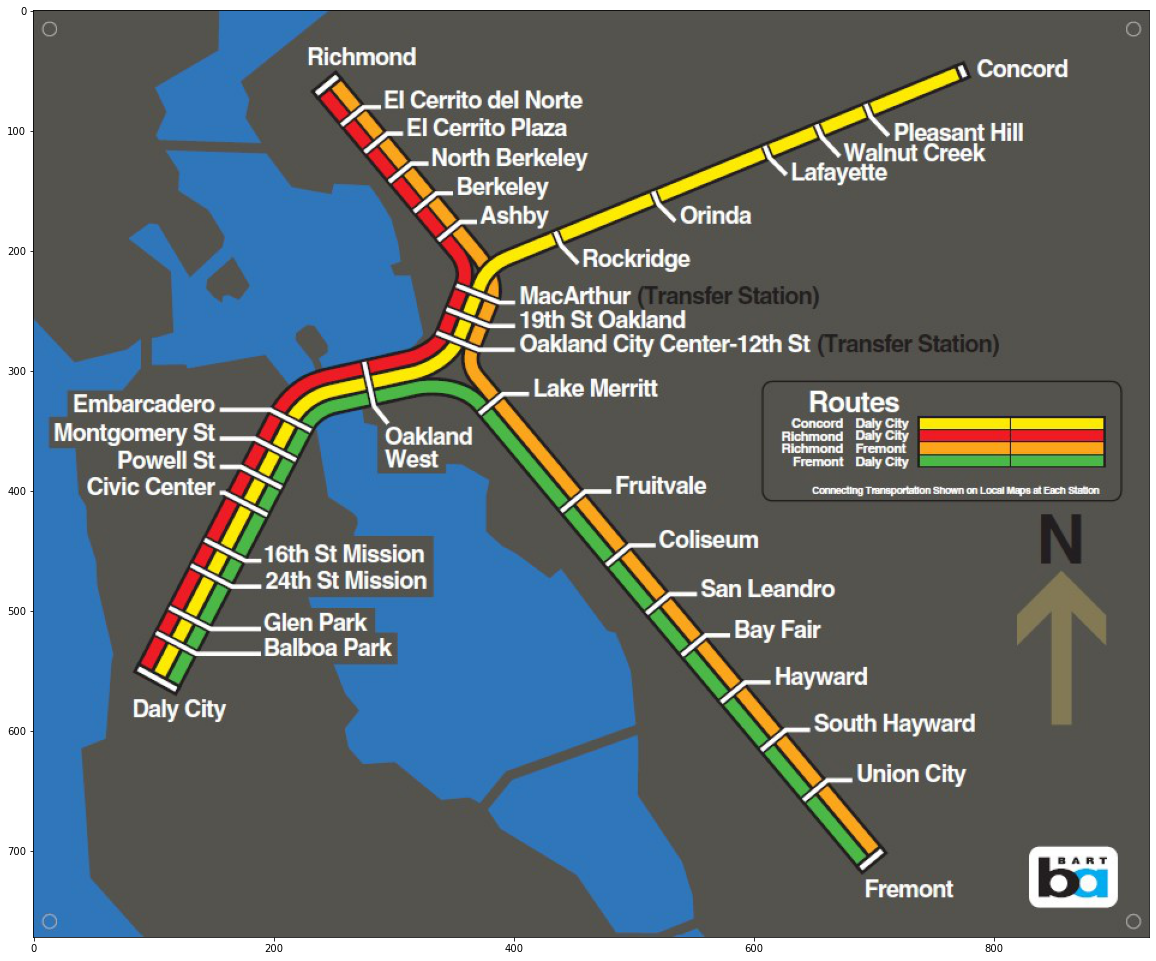

In [12]:
plt.figure(figsize=(20,20))
img = plt.imread("maps4.jpg")
plt.imshow(img)

Which BART station is the busiest? 

What is the least popular BART route?

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='Origin Station', ylabel='count'>

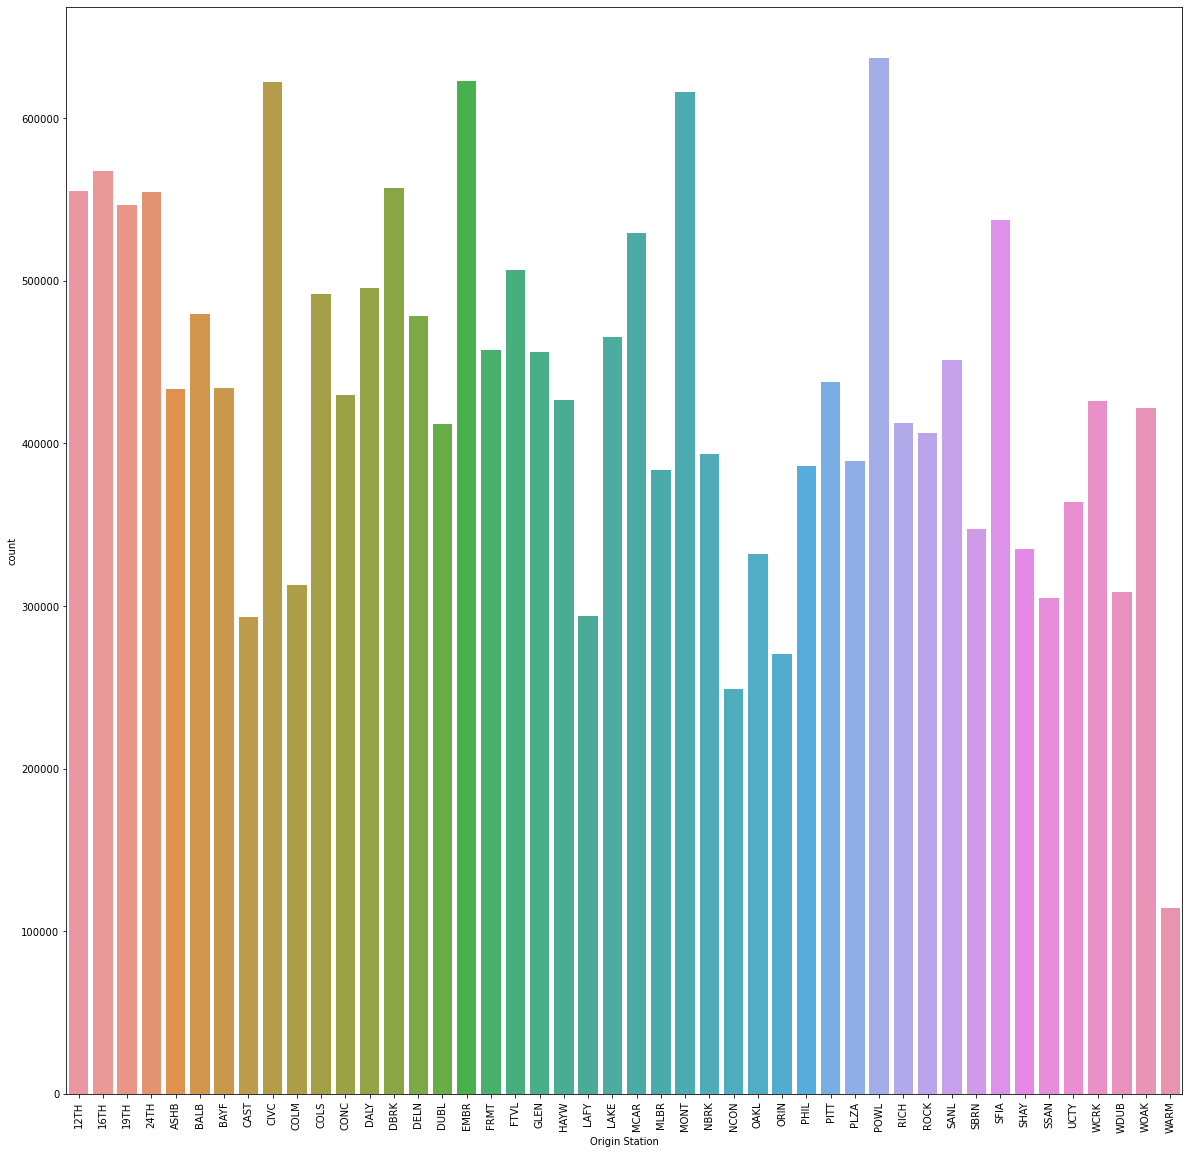

In [14]:
fig = plt.figure(figsize = (20,20))
plt.xticks(rotation=90)
sns.countplot(data=df, x="Origin Station")

In [15]:
df.groupby(df["Origin Station"]).sum()["Trip Count"].sort_values(ascending = False)

Origin Station
MONT    23800135
EMBR    23359181
POWL    20790322
CIVC    15014601
24TH     7999308
16TH     7899649
12TH     7842906
19TH     7734160
DBRK     7711329
BALB     6980958
DALY     5706218
MCAR     5441933
DELN     5075070
FTVL     5053538
FRMT     4910938
DUBL     4890721
SFIA     4802952
WOAK     4769962
GLEN     4738936
COLS     4469889
PHIL     4342217
LAKE     4276515
WCRK     4102746
MLBR     4088486
PITT     3772274
SANL     3637928
CONC     3600811
BAYF     3536372
ROCK     3394878
ASHB     3364016
PLZA     2966661
HAYW     2925661
UCTY     2809471
NBRK     2765511
RICH     2649310
COLM     2598224
SBRN     2233209
SSAN     2124273
LAFY     2101283
WDUB     2090457
SHAY     1830907
CAST     1772016
ORIN     1768133
NCON     1618405
OAKL     1054240
WARM      663004
Name: Trip Count, dtype: int64

When is the best time to go to SF from Berkeley if you want to find a seat?

Which day of the week is the busiest?



<AxesSubplot:xlabel='day', ylabel='count'>

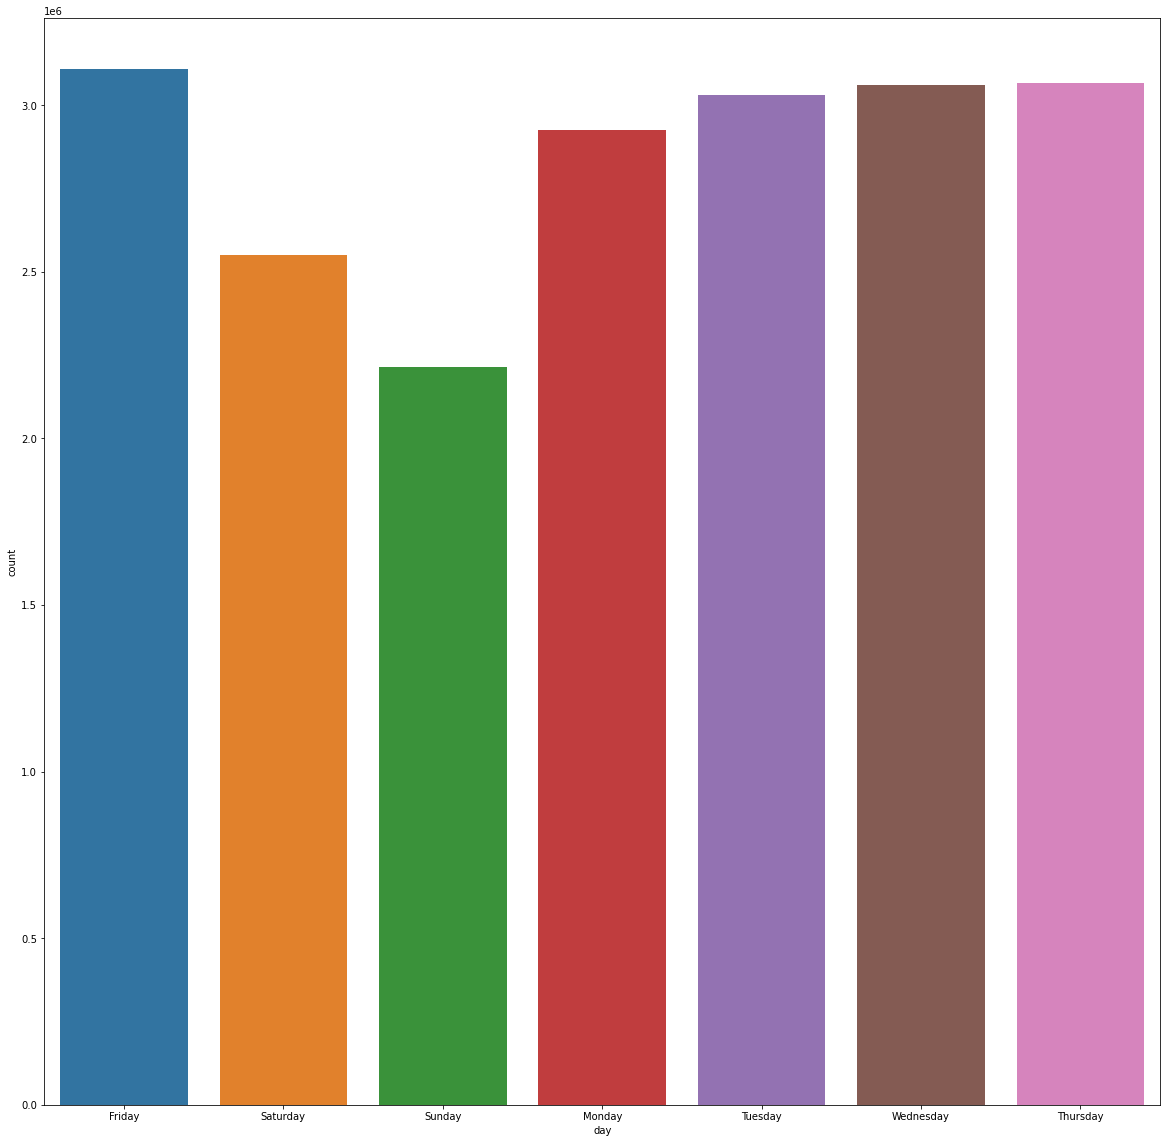

In [16]:
fig = plt.figure(figsize=(20,20))
sns.countplot(data=df,x='day')

<AxesSubplot:xlabel='Hour', ylabel='count'>

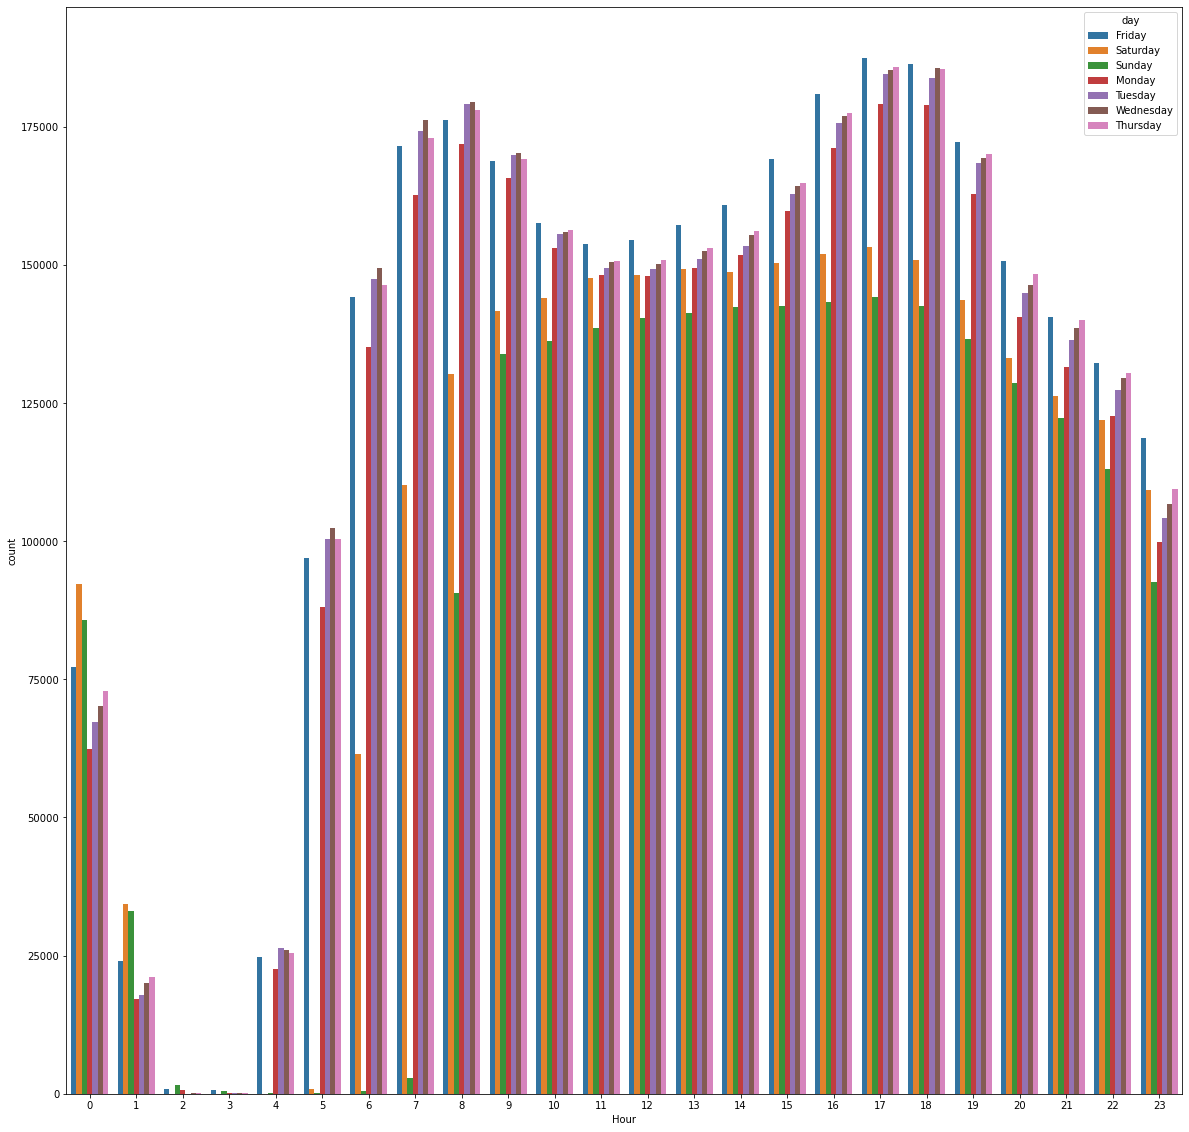

In [17]:
fig = plt.figure(figsize=(20,20))
sns.countplot(data=df,x='Hour',hue='day')

In [18]:
df.groupby(df["day"]).sum()["Trip Count"].sort_values(ascending=False)

day
Wednesday    45185430
Thursday     44821062
Tuesday      44458845
Friday       42191061
Monday       39849993
Saturday     20055208
Sunday       14518115
Name: Trip Count, dtype: int64

How many people take the BART late at night?

In [19]:
a=df.groupby("Hour")["Trip Count"].sum().sort_values(ascending=False)

In [20]:
a

Hour
17    27813272
8     26245142
18    25812109
9     20406841
16    18547607
7     17621693
19    14650901
15    12607053
10    11401688
14    10009593
13     9140087
11     9030065
12     8950559
20     8439157
6      7574290
21     6774216
22     5831246
23     4420376
5      2747284
0      2221267
1       410470
4       374944
2        39659
3        10195
Name: Trip Count, dtype: int64

<AxesSubplot:xlabel='Hour', ylabel='Trip Count'>

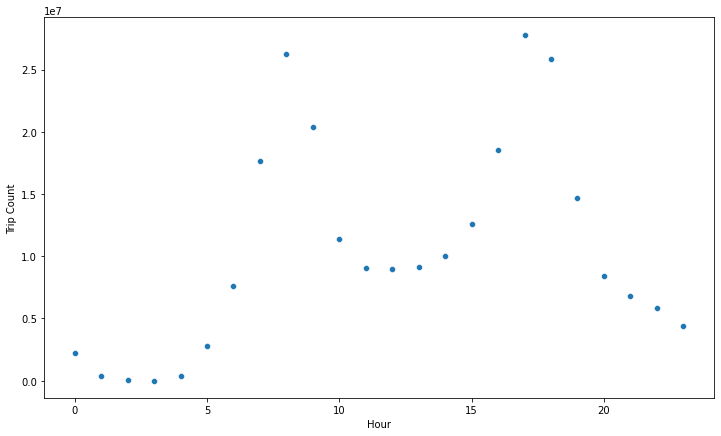

In [21]:
fig = plt.figure(figsize=(12,7))
sns.scatterplot(data=a)

#### Compute the straight line distance between every station

In [22]:
df1 = pd.read_csv("station_info.csv")

In [23]:
df1

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)
5,BALB,"401 Geneva Avenue, San Francisco CA 94112<br /...","-122.447506,37.721585,0",Balboa Park (BALB)
6,BAYF,"15242 Hesperian Blvd., San Leandro CA 94578<br...","-122.126514,37.696924,0",Bay Fair (BAYF)
7,CAST,"3301 Norbridge Dr., Castro Valley CA 94546<br ...","-122.075602,37.690746,0",Castro Valley (CAST)
8,CIVC,"1150 Market Street, San Francisco CA 94102<br ...","-122.414123,37.779732,0",Civic Center/UN Plaza (CIVC)
9,COLS,"7200 San Leandro St., Oakland CA 94621<br />We...","-122.196869,37.753661,0",Coliseum/Oakland Airport (COLS)


In [24]:
del df1["Description"]
del df1["Name"]

In [25]:
df1

,Abbreviation,Location
0,12TH,"-122.271450,37.803768,0"
1,16TH,"-122.419694,37.765062,0"
2,19TH,"-122.268602,37.808350,0"
3,24TH,"-122.418143,37.752470,0"
4,ASHB,"-122.270062,37.852803,0"
5,BALB,"-122.447506,37.721585,0"
6,BAYF,"-122.126514,37.696924,0"
7,CAST,"-122.075602,37.690746,0"
8,CIVC,"-122.414123,37.779732,0"
9,COLS,"-122.196869,37.753661,0"


In [26]:
Long = [line[:11]for line in df1["Location"]]
Lat = [line[12:21]for line in df1["Location"]]

In [27]:
Long, Lat

(['-122.271450',
  '-122.419694',
  '-122.268602',
  '-122.418143',
  '-122.270062',
  '-122.447506',
  '-122.126514',
  '-122.075602',
  '-122.414123',
  '-122.196869',
  '-122.466233',
  '-122.029095',
  '-122.469081',
  '-122.268133',
  '-122.316794',
  '-121.899179',
  '-122.397020',
  '-121.976608',
  '-122.224175',
  '-122.433817',
  '-122.087018',
  '-122.124630',
  '-122.265180',
  '-122.267040',
  '-122.386702',
  '-122.401066',
  '-122.283440',
  '-122.024653',
  '-122.212191',
  '-122.183791',
  '-122.056012',
  '-121.945154',
  '-122.298904',
  '-122.407974',
  '-122.353099',
  '-122.251371',
  '-122.160844',
  '-122.416287',
  '-122.392409',
  '-122.057189',
  '-122.443960',
  '-122.017388',
  '-121.939313',
  '-122.067527',
  '-121.928240',
  '-122.295140'],
 ['37.803768',
  '37.765062',
  '37.808350',
  '37.752470',
  '37.852803',
  '37.721585',
  '37.696924',
  '37.690746',
  '37.779732',
  '37.753661',
  '37.684638',
  '37.973737',
  '37.706121',
  '37.870104',
  '37.9

In [28]:
df1["longitude"] = Long
df1["latitude"] = Lat
del df1["Location"]

In [29]:
df1

,Abbreviation,longitude,latitude
0,12TH,-122.271450,37.803768
1,16TH,-122.419694,37.765062
2,19TH,-122.268602,37.808350
3,24TH,-122.418143,37.752470
4,ASHB,-122.270062,37.852803
5,BALB,-122.447506,37.721585
6,BAYF,-122.126514,37.696924
7,CAST,-122.075602,37.690746
8,CIVC,-122.414123,37.779732
9,COLS,-122.196869,37.753661


In [30]:
df3=df1.copy()

In [31]:
df1.columns=["Origin Station","o_latitute","o_longitude"]

In [32]:
df3.columns=["Destination Station","d_latitute","d_longitude"]

In [33]:
df_hm = pd.merge(df,df1)

In [34]:
df_hm

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,o_latitute,o_longitude
0,0,12TH,12TH,1,2016,January,Friday,-122.271450,37.803768
1,0,12TH,16TH,1,2016,January,Friday,-122.271450,37.803768
2,0,12TH,24TH,4,2016,January,Friday,-122.271450,37.803768
3,0,12TH,ASHB,4,2016,January,Friday,-122.271450,37.803768
4,0,12TH,BALB,2,2016,January,Friday,-122.271450,37.803768
...,...,...,...,...,...,...,...,...,...
19947752,1,WARM,FRMT,1,2018,January,Monday,-121.939313,37.502171
19947753,1,WARM,PHIL,1,2018,January,Monday,-121.939313,37.502171
19947754,1,WARM,POWL,1,2018,January,Monday,-121.939313,37.502171
19947755,2,WARM,DUBL,1,2018,January,Monday,-121.939313,37.502171


In [35]:
df_f = pd.merge(df_hm,df3)

In [36]:
df_f

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,o_latitute,o_longitude,d_latitute,d_longitude
0,0,12TH,12TH,1,2016,January,Friday,-122.271450,37.803768,-122.271450,37.803768
1,1,12TH,12TH,1,2016,January,Friday,-122.271450,37.803768,-122.271450,37.803768
2,2,12TH,12TH,4,2016,January,Friday,-122.271450,37.803768,-122.271450,37.803768
3,11,12TH,12TH,1,2016,January,Friday,-122.271450,37.803768,-122.271450,37.803768
4,12,12TH,12TH,1,2016,January,Friday,-122.271450,37.803768,-122.271450,37.803768
...,...,...,...,...,...,...,...,...,...,...,...
19947752,14,WARM,WARM,1,2017,December,Sunday,-121.939313,37.502171,-121.939313,37.502171
19947753,16,WARM,WARM,4,2017,December,Sunday,-121.939313,37.502171,-121.939313,37.502171
19947754,20,WARM,WARM,4,2017,December,Sunday,-121.939313,37.502171,-121.939313,37.502171
19947755,21,WARM,WARM,1,2017,December,Sunday,-121.939313,37.502171,-121.939313,37.502171


In [37]:
df_new = df_f[df_f['Origin Station'] != df_f['Destination Station']]       # If Origin station and destination station is same it is not logical  

In [38]:
df_new 

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,o_latitute,o_longitude,d_latitute,d_longitude
10474,0,16TH,12TH,9,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768
10475,1,16TH,12TH,27,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768
10476,2,16TH,12TH,22,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768
10477,3,16TH,12TH,14,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768
10478,8,16TH,12TH,1,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768
...,...,...,...,...,...,...,...,...,...,...,...
19944257,19,WOAK,WARM,2,2017,December,Friday,-122.295140,37.804872,-121.939313,37.502171
19944258,9,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171
19944259,11,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171
19944260,16,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171


In [40]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [41]:
from math import radians, cos, sin, asin, sqrt

In [42]:
df_new['d_longitude'] = df_new['d_longitude'].astype('float64') 
df_new['o_longitude'] = df_new['o_longitude'].astype('float64') 
df_new['o_latitute'] = df_new['o_latitute'].astype('float64') 
df_new['d_latitute'] = df_new['d_latitute'].astype('float64')

C:\Users\User\AppData\Local\Temp\ipykernel_4804\3095711121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['d_longitude'] = df_new['d_longitude'].astype('float64')
C:\Users\User\AppData\Local\Temp\ipykernel_4804\3095711121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['o_longitude'] = df_new['o_longitude'].astype('float64')
C:\Users\User\AppData\Local\Temp\ipykernel_4804\3095711121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [43]:
df_new["long_distance"] = df_new["d_longitude"] - df_new["o_longitude"]
df_new["lat_distance"] = df_new["o_latitute"] - df_new["d_latitute"]

C:\Users\User\AppData\Local\Temp\ipykernel_4804\236863842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["long_distance"] = df_new["d_longitude"] - df_new["o_longitude"]
C:\Users\User\AppData\Local\Temp\ipykernel_4804\236863842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["lat_distance"] = df_new["o_latitute"] - df_new["d_latitute"]


In [44]:
df_new

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,o_latitute,o_longitude,d_latitute,d_longitude,long_distance,lat_distance
10474,0,16TH,12TH,9,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244
10475,1,16TH,12TH,27,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244
10476,2,16TH,12TH,22,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244
10477,3,16TH,12TH,14,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244
10478,8,16TH,12TH,1,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19944257,19,WOAK,WARM,2,2017,December,Friday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827
19944258,9,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827
19944259,11,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827
19944260,16,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827


In [45]:
df_new.lat_distance[88858]

0.19584799999999802

In [46]:
o_lat = df_new["o_latitute"]
d_lat = df_new["d_latitute"]
o_lon = df_new["o_longitude"]
d_lon = df_new["d_longitude"]
dif_lon = d_lon - o_lon
dif_lat = d_lat - o_lat

q=np.sin(dif_lat/2)**2+np.cos(o_lat)*np.cos(d_lat)*np.sin(dif_lon/2)**2
Q=2 * np.arctan2(np.sqrt(q), np.sqrt(1 - q))

R_km=6371   # Earth 

distance=Q*R_km/100
df_new['Distance']=distance


C:\Users\User\AppData\Local\Temp\ipykernel_4804\3681345421.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Distance']=distance


In [47]:
df_new

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,o_latitute,o_longitude,d_latitute,d_longitude,long_distance,lat_distance,Distance
10474,0,16TH,12TH,9,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244,9.751025
10475,1,16TH,12TH,27,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244,9.751025
10476,2,16TH,12TH,22,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244,9.751025
10477,3,16TH,12TH,14,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244,9.751025
10478,8,16TH,12TH,1,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244,9.751025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19944257,19,WOAK,WARM,2,2017,December,Friday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827,28.680454
19944258,9,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827,28.680454
19944259,11,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827,28.680454
19944260,16,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827,28.680454


In [48]:
df_new.drop_duplicates().reset_index(drop=True)

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,o_latitute,o_longitude,d_latitute,d_longitude,long_distance,lat_distance,Distance
0,0,16TH,12TH,9,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244,9.751025
1,1,16TH,12TH,27,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244,9.751025
2,2,16TH,12TH,22,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244,9.751025
3,3,16TH,12TH,14,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244,9.751025
4,8,16TH,12TH,1,2016,January,Friday,-122.419694,37.765062,-122.271450,37.803768,0.038706,-0.148244,9.751025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397529,19,WOAK,WARM,1,2017,December,Thursday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827,28.680454
15397530,19,WOAK,WARM,2,2017,December,Friday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827,28.680454
15397531,9,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827,28.680454
15397532,16,WOAK,WARM,1,2017,December,Saturday,-122.295140,37.804872,-121.939313,37.502171,-0.302701,-0.355827,28.680454


In [49]:
df_distance = df_new[["Origin Station","Destination Station","Distance"]]

In [50]:
df_distance

,Origin Station,Destination Station,Distance
10474,16TH,12TH,9.751025
10475,16TH,12TH,9.751025
10476,16TH,12TH,9.751025
10477,16TH,12TH,9.751025
10478,16TH,12TH,9.751025
...,...,...,...
19944257,WOAK,WARM,28.680454
19944258,WOAK,WARM,28.680454
19944259,WOAK,WARM,28.680454
19944260,WOAK,WARM,28.680454


### Let's see the distance from WOAK to WARM as an example

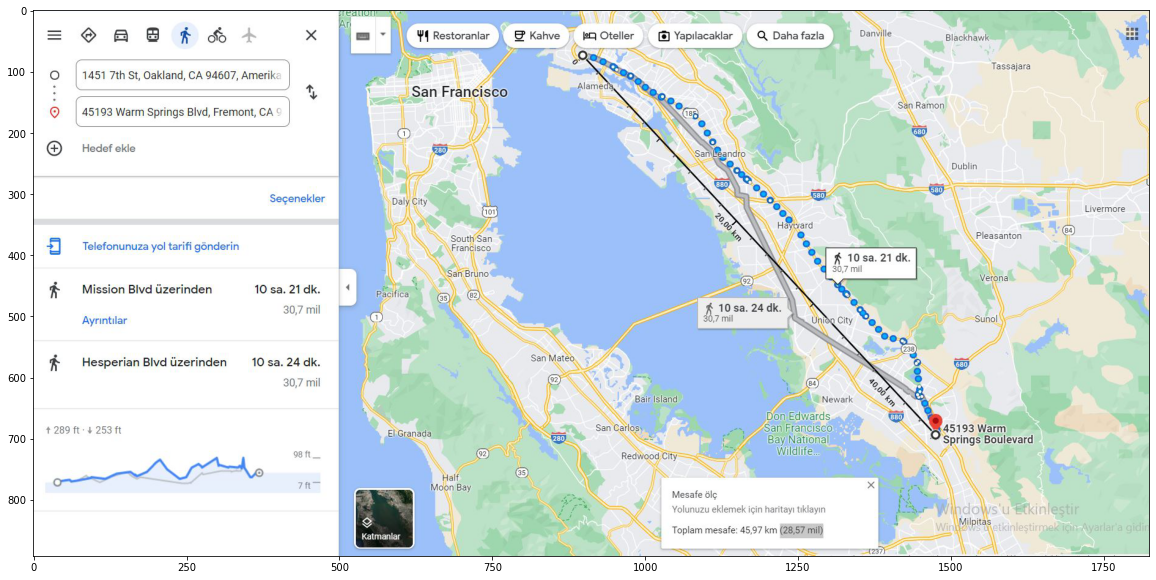

In [51]:
plt.figure(figsize=(20,20))
img=plt.imread('Distance_exp.JPG')
plt.imshow(img)
plt.show()

We can see that we find almost the same distance ! 

In [52]:
import networkx as nx
df_distance = nx.from_pandas_edgelist(df,source="Origin Station",target="Destination Station",edge_attr=True)

In [53]:
df_distance.nodes()

NodeView(('12TH', '16TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CIVC', 'CONC', 'DBRK', 'DELN', 'DUBL', 'EMBR', 'FTVL', 'LAFY', 'LAKE', 'MCAR', 'MONT', 'NBRK', 'ORIN', 'PHIL', 'PITT', 'PLZA', 'POWL', 'ROCK', 'SANL', 'SBRN', 'SHAY', 'WCRK', 'WOAK', '19TH', 'COLM', 'COLS', 'DALY', 'GLEN', 'MLBR', 'NCON', 'RICH', 'SSAN', 'UCTY', 'WDUB', 'CAST', 'HAYW', 'SFIA', 'FRMT', 'OAKL', 'WARM'))

In [54]:
df_distance.edges()

EdgeView([('12TH', '12TH'), ('12TH', '16TH'), ('12TH', '24TH'), ('12TH', 'ASHB'), ('12TH', 'BALB'), ('12TH', 'BAYF'), ('12TH', 'CIVC'), ('12TH', 'CONC'), ('12TH', 'DBRK'), ('12TH', 'DELN'), ('12TH', 'DUBL'), ('12TH', 'EMBR'), ('12TH', 'FTVL'), ('12TH', 'LAFY'), ('12TH', 'LAKE'), ('12TH', 'MCAR'), ('12TH', 'MONT'), ('12TH', 'NBRK'), ('12TH', 'ORIN'), ('12TH', 'PHIL'), ('12TH', 'PITT'), ('12TH', 'PLZA'), ('12TH', 'POWL'), ('12TH', 'ROCK'), ('12TH', 'SANL'), ('12TH', 'SBRN'), ('12TH', 'SHAY'), ('12TH', 'WCRK'), ('12TH', 'WOAK'), ('12TH', '19TH'), ('12TH', 'DALY'), ('12TH', 'FRMT'), ('12TH', 'GLEN'), ('12TH', 'MLBR'), ('12TH', 'SFIA'), ('12TH', 'CAST'), ('12TH', 'COLM'), ('12TH', 'COLS'), ('12TH', 'HAYW'), ('12TH', 'NCON'), ('12TH', 'RICH'), ('12TH', 'SSAN'), ('12TH', 'UCTY'), ('12TH', 'WDUB'), ('12TH', 'OAKL'), ('12TH', 'WARM'), ('16TH', '16TH'), ('16TH', '19TH'), ('16TH', '24TH'), ('16TH', 'ASHB'), ('16TH', 'BALB'), ('16TH', 'BAYF'), ('16TH', 'CIVC'), ('16TH', 'COLM'), ('16TH', 'COLS'), 

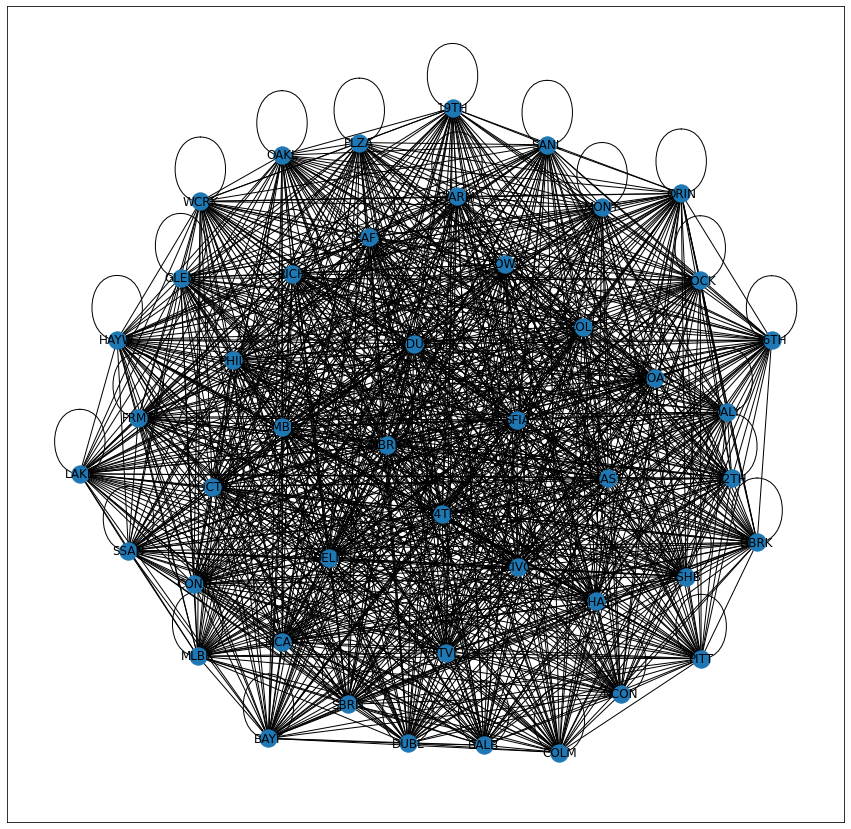

In [55]:
plt.figure(figsize=(15,15))
nx.draw_networkx(df_distance,with_labels=True)

#### Build a model that can predicted the number of people commuting to work by Bart between any 2 stations:

In [56]:
df_new = df_new.drop(["o_latitute", "o_longitude","d_latitute", "d_longitude", "long_distance", "lat_distance"], axis = 1)

In [57]:
 df_new

,Hour,Origin Station,Destination Station,Trip Count,year,month,day,Distance
10474,0,16TH,12TH,9,2016,January,Friday,9.751025
10475,1,16TH,12TH,27,2016,January,Friday,9.751025
10476,2,16TH,12TH,22,2016,January,Friday,9.751025
10477,3,16TH,12TH,14,2016,January,Friday,9.751025
10478,8,16TH,12TH,1,2016,January,Friday,9.751025
...,...,...,...,...,...,...,...,...
19944257,19,WOAK,WARM,2,2017,December,Friday,28.680454
19944258,9,WOAK,WARM,1,2017,December,Saturday,28.680454
19944259,11,WOAK,WARM,1,2017,December,Saturday,28.680454
19944260,16,WOAK,WARM,1,2017,December,Saturday,28.680454


In [58]:
df_sample = df_new.sample(50000)

In [64]:
x,y=df_sample.drop("Trip Count",axis=1),df_sample[["Trip Count"]]

In [67]:
x = pd.get_dummies(x, drop_first = True)

In [68]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    
    return result.sort_values('R_Squared',ascending=False)

In [69]:
regression_funct(x,y)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,R_Squared,RMSE,MAE
KNeighborsRegressor,0.526608,22.309986,9.010480
ExtraTreeRegressor,0.503595,22.845815,7.609100
GradientBoostingRegressor,0.460498,23.816901,9.534754
Ridge,0.178638,29.387059,12.230748
LinearRegression,0.178619,29.387395,12.236104
ElasticNet,0.007692,32.300712,14.126942
Lasso,0.004822,32.347389,14.166839


In [70]:
# We have to add a total passenger column for more correct results